#### Importing libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

#### Importing Data from .csv file


In [12]:
columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
dataset = pd.read_csv('iris_data.csv',names=columns)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
dataset.shape

(150, 5)

## Exploratory Data Analysis (EDA)
<hr>

#### Histogram of petal length

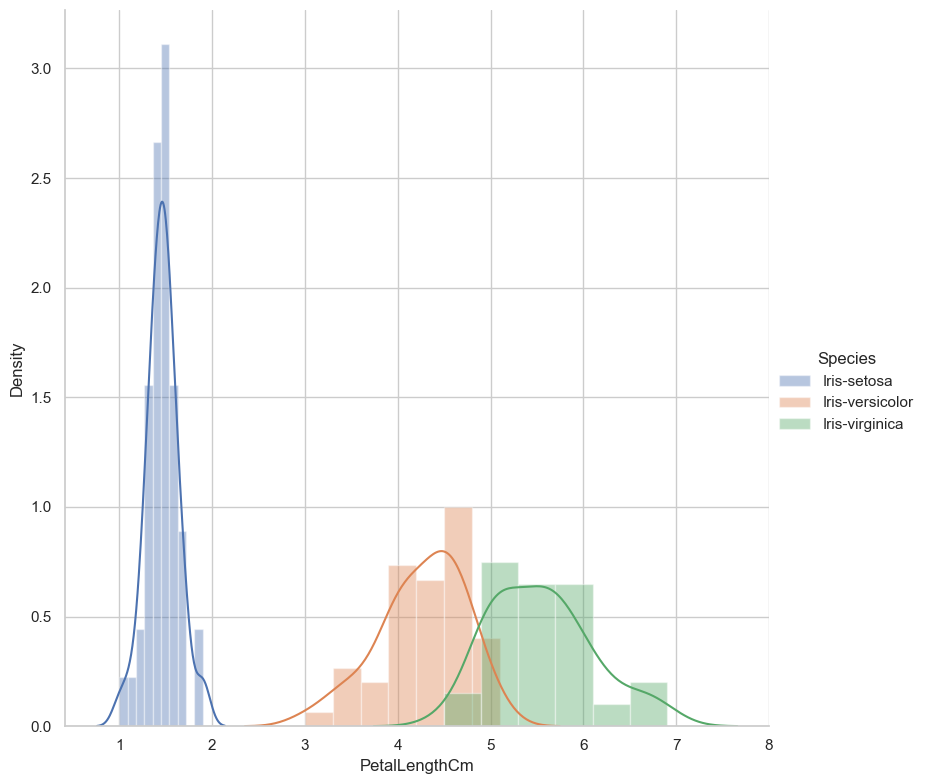

In [23]:
sns.FacetGrid(dataset, hue="Species", height=8) \
    .map(sns.distplot, "PetalLengthCm") \
    .add_legend()
plt.show()

#### Histogram of petal width


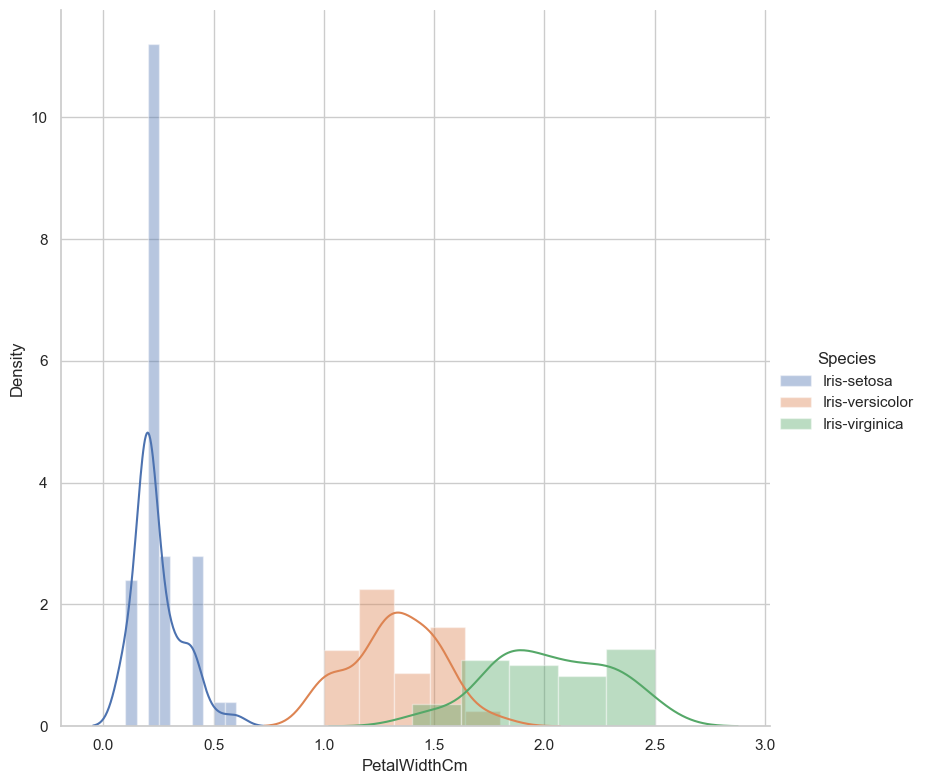

In [24]:
sns.FacetGrid(dataset,hue="Species",height=8) \
    .map(sns.distplot,"PetalWidthCm") \
    .add_legend()
plt.show()

#### Histogram of sepal length

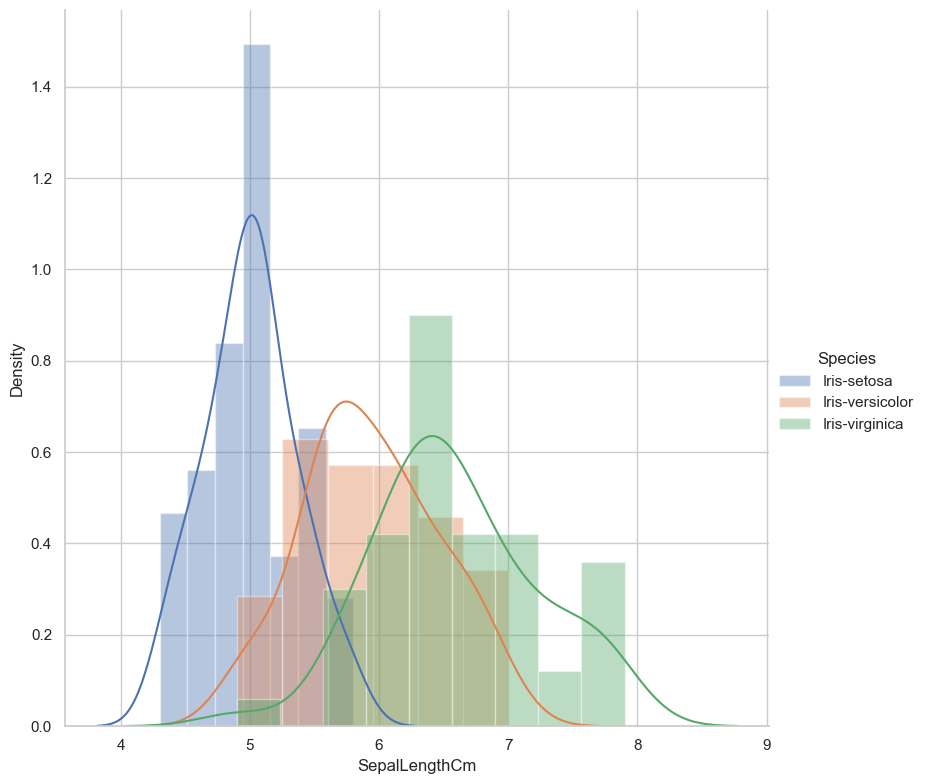

In [26]:
sns.FacetGrid(dataset,hue="Species",height=8) \
    .map(sns.distplot,"SepalLengthCm") \
    .add_legend()
plt.show()

#### Histogram of sepal width


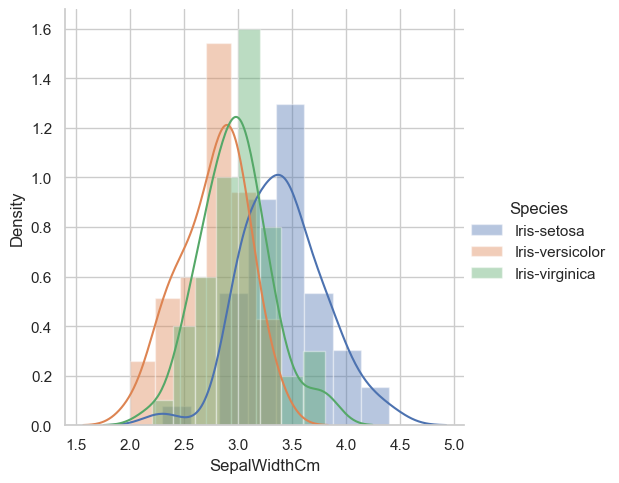

In [27]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.distplot,"SepalWidthCm") \
    .add_legend()
plt.show()

#### 2D scatter plot


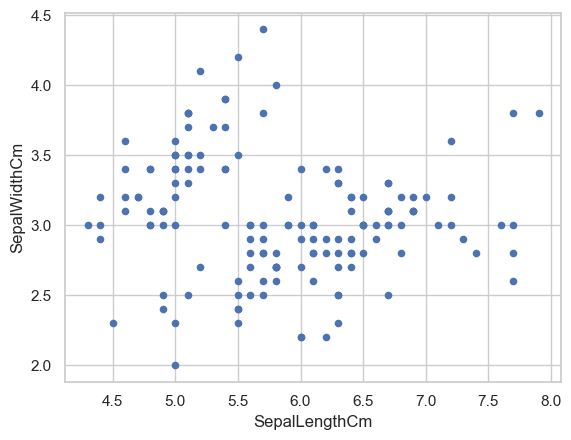

In [28]:
dataset.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm')
plt.show()

#### 2D scatter plot with color-coding for each flower type/class.

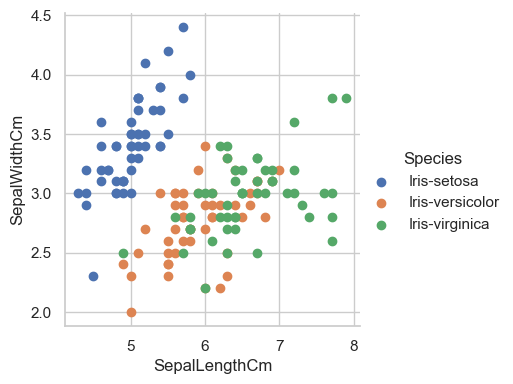

In [30]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="Species", height=4) \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()

#### Pairwise Scatter Plot


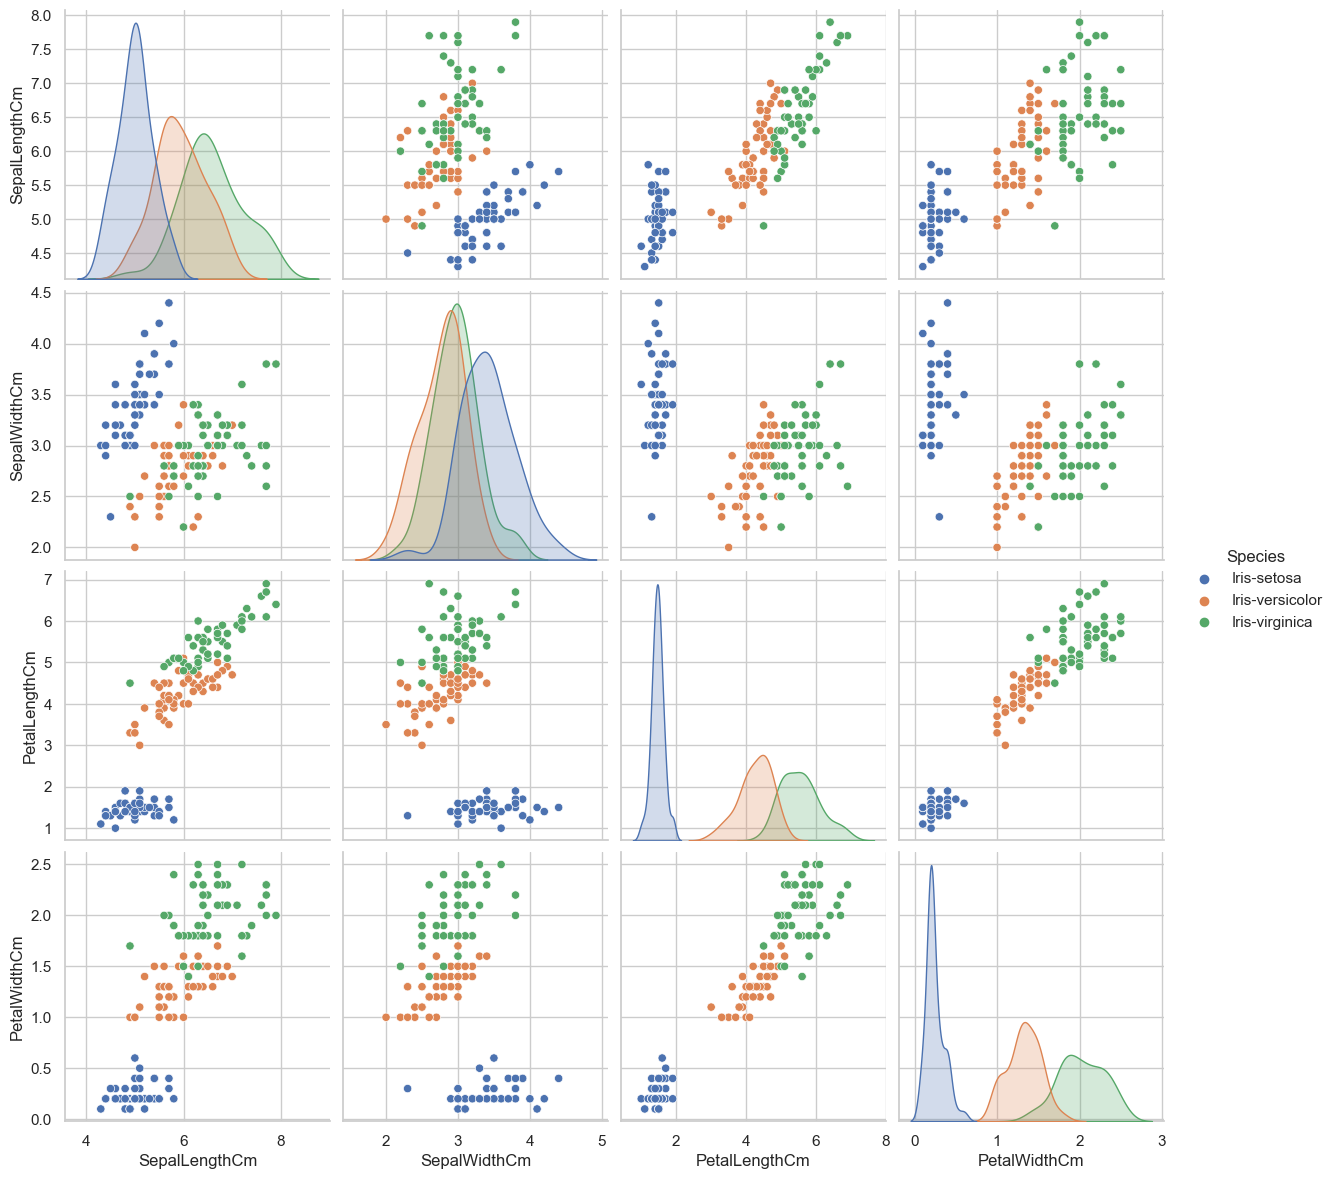

In [31]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="Species",size=3,aspect=1)
plt.show()

## Data Preprocessing
<hr>

In [32]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [33]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Descriptive statistics of data set


In [35]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for Null Values


In [36]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Label Encoding


In [39]:
label_encoder = preprocessing.LabelEncoder() 
dataset['Species']= label_encoder.fit_transform(dataset['Species']) 

dataset['Species'].unique()

array([0, 1, 2], dtype=int64)

#### Splitting the dataSet


In [40]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [41]:
len(X)

150

In [42]:
len(y)

150

#### Heatmap is to identify the highly correlated features


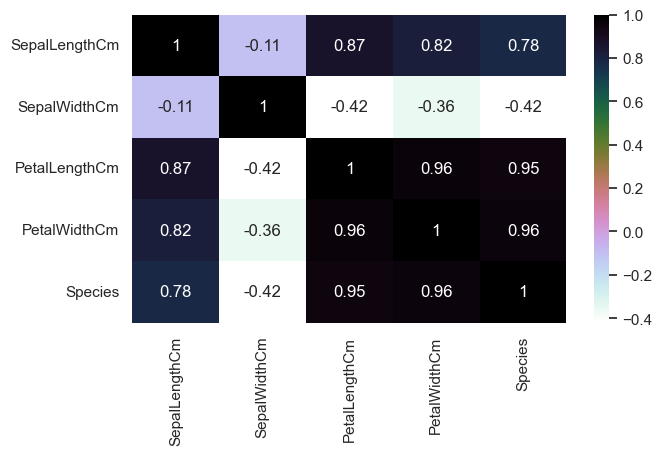

In [43]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Model Development
<hr>

#### Splitting the dataset into train set and test set


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)

#### Feature Scaling


In [45]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### DecisionTree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier object
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Get the parameters and their default values
params = classifier.get_params()

# Format the parameters as a string
output = "DecisionTreeClassifier("
for param, value in params.items():
    output += f"{param}={value}, "
output = output.rstrip(', ')
output += ")"
print(output)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion=entropy, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=0, splitter=best)


#### Predicting the test results


In [54]:
# Fit the classifier with training data
classifier.fit(X_train, y_train)

# Now make the predictions
y_pred = classifier.predict(X_test)

#### Making the confusion matrix


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

### Visualization

#### Visualising the Training set results


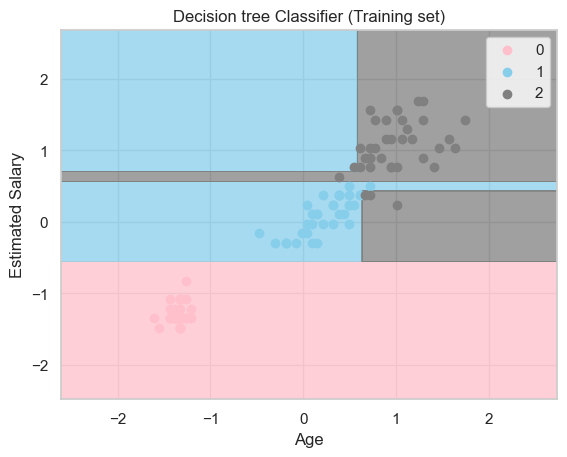

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink','skyblue','gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'skyblue','gray'))(i), label = j)
plt.title('Decision tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualising the Test set results


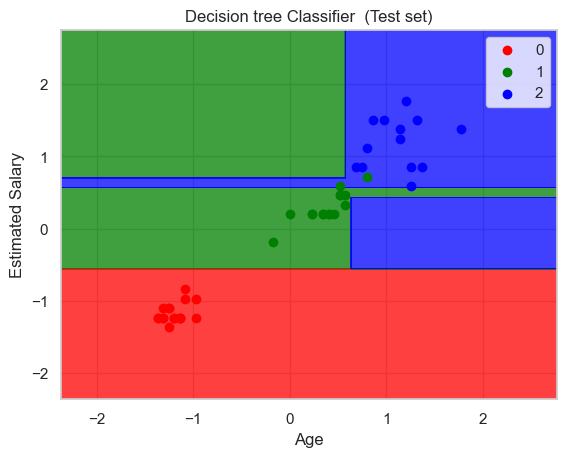

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision tree Classifier  (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Accuracy


In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The accuracy of the Decision Tree Classifier is : %.2f'%accuracy_score(y_pred,y_test))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))

The accuracy of the Decision Tree Classifier is : 0.96
RMSE value = 0.21
R2 Score= 0.93


In [59]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        17\n           1       1.00      0.87      0.93        15\n           2       0.87      1.00      0.93        13\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

### KNN Algorithm


In [68]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

def print_model_details(model):
    params = model.get_params()
    param_str = ', '.join([f'{param}={repr(params[param])}' for param in params])
    output = f"{model.__class__.__name__}({param_str})"
    print(output)
    
model = KNeighborsClassifier(n_neighbors=3)

In [69]:
model.fit(X_train, y_train)

# Print the detailed output
print_model_details(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')


In [71]:
predict = model.predict(X_test)

#### Accuracy


In [72]:
#for checking the model accuracy
print('The accuracy of the KNN is',accuracy_score(predict,y_test))
rmse = sqrt(mean_squared_error(y_test, predict))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predict))

The accuracy of the KNN is 0.9555555555555556
RMSE value = 0.21
R2 Score= 0.93


### SVM

In [76]:
from sklearn import svm
svc = svm.SVC(C=1.0, kernel='rbf')

In [77]:
svc.fit(X_train,y_train)

# Get the parameters and their values
params = svc.get_params()

# Print the parameters and values
for param, value in params.items():
    print(f"{param} = {value}")

C = 1.0
break_ties = False
cache_size = 200
class_weight = None
coef0 = 0.0
decision_function_shape = ovr
degree = 3
gamma = scale
kernel = rbf
max_iter = -1
probability = False
random_state = None
shrinking = True
tol = 0.001
verbose = False


In [78]:
pred = svc.predict(X_test)

#### Validation


In [79]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.98
RMSE value = 0.15
R2 Score= 0.97


## Logistic Regression


In [80]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 

#### Accuracy


In [81]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
RMSE value = 0.15
R2 Score= 0.97
